# Project

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
import pandas as pd
import plotly.io as pio
import seaborn as sns
%matplotlib inline

In [2]:
from utils import *
from handle_dataset import *
from density import * 
from zscore import *
from plots import * 
from kmeans import *

In [3]:
DATA_PATH = 'data'

In [4]:
RESULTS_PATH = 'results'

In [6]:
activities_labels = {
    1 : 'STAND',
    2 : 'SIT',
    3 : 'SIT&TALK',
    4 : 'WALK',
    5 : 'WALK&TALK',
    6 : 'CLIMB_STAIRS',
    7 : 'CLIMB_STAIRS&TALK',
    8 : 'STAND_TO_SIT',
    9 : 'SIT_TO_STAND',
    10: 'STAND_TO_SIT&TALK',
    11: 'SIT&TALK_TO_STAND',
    12: 'STAND_TO_WALK', 
    13: 'WALK_TO_STAND', 
    14: 'STAND_TO_CLIMB_STAIRS',
    15: 'CLIMB_STAIRS_TO_WALK',
    16: 'CLIMB_STAIRS&TALK_TO_WALK&TALK', 

}

In [7]:
labels = [
    'STAND',
    'SIT',
    'SIT&TALK',
    'WALK',
    'WALK&TALK',
    'CLIMB_STAIRS',
    'CLIMB_STAIRS&TALK',
    'STAND_TO_SIT',
    'SIT_TO_STAND',
    'STAND_TO_SIT&TALK',
    'SIT&TALK_TO_STAND',
    'STAND_TO_WALK', 
    'WALK_TO_STAND', 
    'STAND_TO_CLIMB_STAIRS',
    'CLIMB_STAIRS_TO_WALK',
    'CLIMB_STAIRS&TALK_TO_WALK&TALK', 

]

## Exercise 2 - Import dataset

In [7]:
# data_user_0 = get_user_data(path=DATA_PATH, user_id=0)

In [8]:
# data_user_0.shape

In [20]:
dataset = get_all_data(DATA_PATH)

In [21]:
dataset.shape

(3242728, 12)

In [10]:
# dataset.shape

In [11]:
# type(dataset)

## Explore data

In [12]:
dataset.describe()

,device_id,accelerometer_x,accelerometer_y,accelerometer_z,gyroscope_x,gyroscope_y,gyroscope_z,magnetometer_x,magnetometer_y,magnetometer_z,timestamp,activity
count,3.242728e+06,3.242728e+06,3.242728e+06,3.242728e+06,3.242728e+06,3.242728e+06,3.242728e+06,3.242728e+06,3.242728e+06,3.242728e+06,3.242728e+06,3.242728e+06
mean,3.429246e+00,7.717793e-01,8.451621e+00,1.520613e+00,-1.691060e-01,1.890623e+00,3.556803e-01,-1.450031e-02,6.034252e-01,4.014632e-01,5.555476e+05,4.032846e+00
std,1.188858e+00,2.494840e+00,3.743438e+00,3.747458e+00,3.592437e+01,5.289265e+01,4.621969e+01,4.767157e-01,4.752627e-01,6.953205e-01,3.720966e+05,2.582780e+00
min,1.000000e+00,-2.489000e+01,-2.324600e+01,-2.502500e+01,-5.088600e+02,-5.071500e+02,-4.077900e+02,-2.002100e+00,-1.438800e+00,-1.658700e+00,2.612300e+01,1.000000e+00
25%,2.000000e+00,-5.244600e-01,8.352300e+00,-1.328500e+00,-2.967200e+00,-2.829200e+00,-1.415125e+00,-4.087100e-01,5.211000e-01,-1.977500e-01,2.720200e+05,2.000000e+00
50%,3.000000e+00,3.722300e-01,9.388200e+00,1.323900e+00,1.709100e-01,-1.321600e-01,-1.696150e-02,3.941900e-02,7.182500e-01,4.391300e-01,5.370900e+05,4.000000e+00
75%,4.000000e+00,2.006400e+00,9.801800e+00,3.299600e+00,5.930100e+00,8.948325e+00,5.541700e+00,3.250500e-01,8.825900e-01,9.627200e-01,8.008600e+05,5.000000e+00
max,5.000000e+00,2.538100e+01,2.598500e+01,2.529000e+01,5.061000e+02,5.035700e+02,4.741600e+02,1.606100e+00,2.988100e+00,3.085500e+00,2.825500e+06,1.600000e+01


In [13]:
# dataset.info()

In [14]:
# dataset.columns

## Append metrics

In [8]:
data_with_features = append_metrics(dataset)

In [16]:
data_with_features

,device_id,accelerometer_x,accelerometer_y,accelerometer_z,gyroscope_x,gyroscope_y,gyroscope_z,magnetometer_x,magnetometer_y,magnetometer_z,timestamp,activity,accelerometer_module,gyroscope_module,magnetometer_module
0,1,-1.8650,9.3890,2.58120,-1.141800,-1.18560,0.84998,-0.34476,0.59839,1.01340,505.89,1,9.914340,1.852517,1.226340
1,1,-1.7963,9.3742,2.44600,-1.561800,-0.66165,0.59730,-0.34274,0.57631,1.00000,525.42,1,9.853184,1.798268,1.203995
2,1,-1.8696,9.3000,2.35140,-1.187700,-1.28410,0.14212,-0.34476,0.59639,1.01560,544.95,1,9.773151,1.754919,1.227185
3,1,-1.7961,9.3624,2.45840,-0.583990,-2.03340,0.42912,-0.32863,0.62249,1.01560,564.48,1,9.845011,2.158681,1.235692
4,1,-1.6768,9.3506,2.46850,-0.370500,-1.36470,0.37194,-0.33669,0.62048,1.02450,584.01,1,9.815237,1.462196,1.244169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3242723,5,-1.0568,9.7161,0.37560,-0.158430,-0.88740,0.44327,0.12121,0.62675,0.36739,1061000.00,1,9.780619,1.004523,0.736534
3242724,5,-1.0565,9.6921,0.38826,0.112400,-0.59353,0.39687,0.11111,0.59880,0.36304,1061000.00,1,9.757240,0.722784,0.709017
3242725,5,-1.0566,9.6920,0.37607,-0.054114,-0.67227,0.36407,0.11717,0.58084,0.35217,1061100.00,1,9.756674,0.766435,0.689295
3242726,5,-1.0563,9.6801,0.38850,0.096447,-0.51923,0.16742,0.11717,0.61677,0.36304,1061100.00,1,9.745309,0.554014,0.725212


## Select only right wrist data

Nos seguintes exercícios, apenas serão usados os dados do pulso direito.

In [9]:
def get_device_data(data, device_id):
    return data[data['device_id'] == device_id]

In [10]:
right_wrist_id = 2
data = get_device_data(data_with_features, right_wrist_id)
right_wrist_data = data[['accelerometer_module', 'gyroscope_module', 'magnetometer_module', 'activity']]
right_features = right_wrist_data[['accelerometer_module','gyroscope_module', 'magnetometer_module']]

## Exercise 3.1 - Boxplot of the vector modules grouped by activity

<Figure size 2100x1000 with 0 Axes>

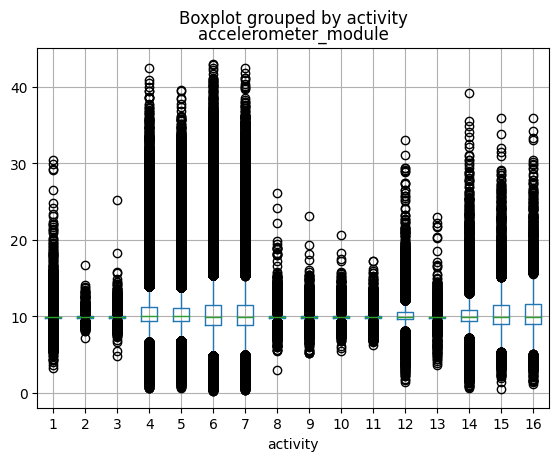

<Figure size 2100x1000 with 0 Axes>

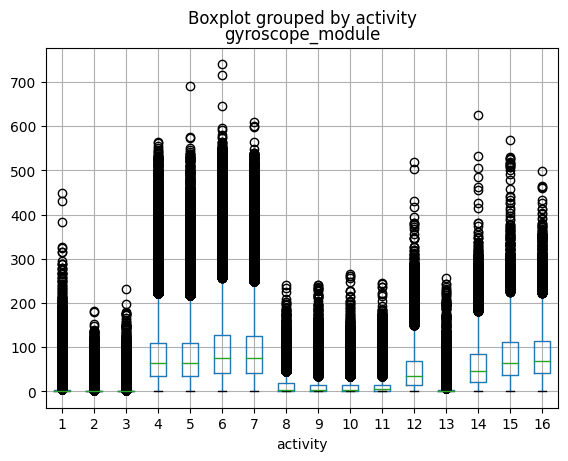

<Figure size 2100x1000 with 0 Axes>

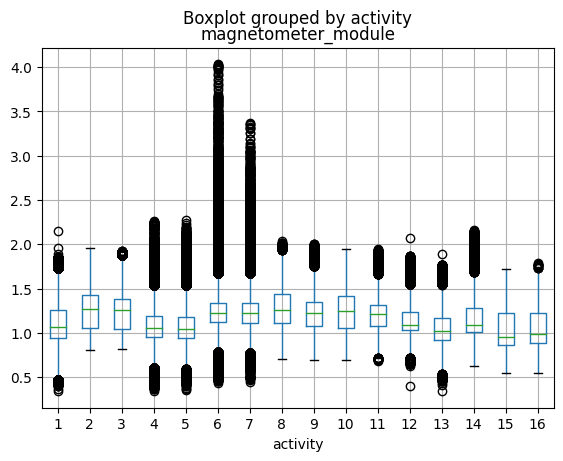

In [19]:
boxplot_features(data_with_features, 0)
boxplot_features(data_with_features, 1)
boxplot_features(data_with_features, 2)

Pelos boxplot dos módulos dos diferentes vetores podemos concluir que:
    - as variáveis estão em ordens de grandeza muito diferentes
    - existe uma grande densidade de outliers. Isto pode dever-se a estarem a ser utilizados neste gráfico todos os dispositivos de sensores, o que poderá afetar os resultados.


### Plotting boxplot of the modules by activity separated by devices

![Boxplot core](./data/images/boxplot.png "Boxplot - detect outliers")

### Plot of the right wrist (id = 2)

<Figure size 2100x1000 with 0 Axes>

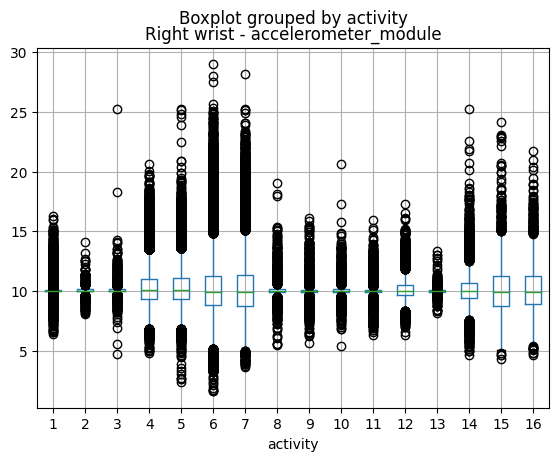

<Figure size 2100x1000 with 0 Axes>

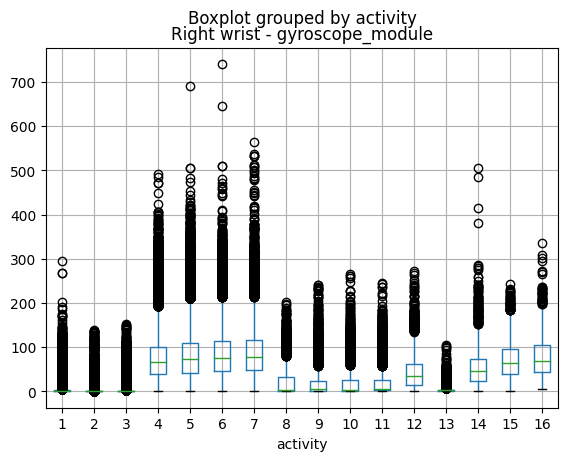

<Figure size 2100x1000 with 0 Axes>

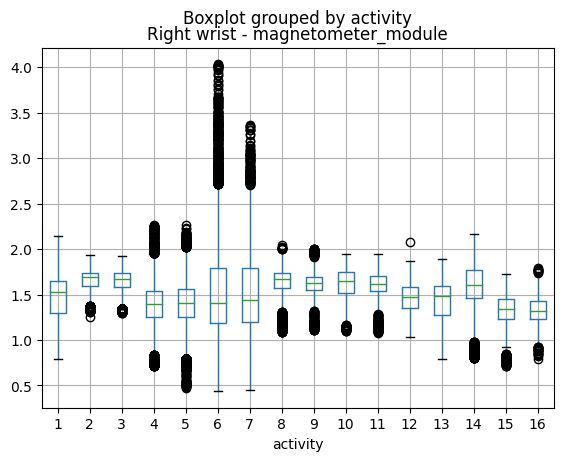

In [20]:
boxplot_features(right_wrist_data, 0, title='Right wrist')
boxplot_features(right_wrist_data, 1, title='Right wrist')
boxplot_features(right_wrist_data, 2, title='Right wrist')

Ao utilizar os dados de apenas od dados de um dispositivo, é notório que a quantidade de outliers diminui consideravelmente. 

In [21]:
# right_wrist_data.describe()

## Exercise 3.2 - Outliers density

In [22]:
# densities = calculate_density_by_activity(data, labels)
# densities

In [23]:
# plot_densities(densities)

Como se pode observar pelas densidades de outliers obtidas, o vetor de aceleração é o que apresenta maior quantidade de outliers. Isto poderá dever-se ao facto de ser o mais sensível a movimentos da pessoa. Pelo contrário, o vetor de variação do campo magnético, em algumas situações nem apresenta outliers. Outra conclusão que podemos retirar do gráfico, é que as atividades *Sit to stand* e *Sit and talk to stand* são as que apresentam maior quantidade de outliers nos três vetores, mostrando que o movimento de levantar gera muitas oscilações e perturbações nos sensores.

## Exercise 3.3 - Z-score test

In [24]:
# plot_zscore_outliers(data,'accelerometer_module')
# plot_zscore_outliers(data,'gyroscope_module')
# # plot_zscore_outliers(data,'magnetometer_module')

Pelos gráficos obtidos, podemos observar que à medida que o k aumenta, o número de pontos considerados outliers diminui. Mostra-se assim, que ao aumentar k, aumentamos a gama de valor válidos, sendo menos sensível a outliers

## Exercise 3.6 - K-means

### Try to divide by activities

Foi utilizado o KMeans com k igual ao número de atividades para tentar perceber se as atividades teriam valores distitos dos módulos dos vetores para as diferentes atividades 

In [25]:
# kmeans = KMeans(optimal_k)

In [26]:
# labels = kmeans.predict(right_features)

In [27]:
# plot_kmeans_clusters(kmeans.data, labels)

In [28]:
# labels.to_csv('labels.csv', index=False)

In [19]:
# plot_3d(kmeans.data, labels, 'KMeans clusters for all devices with k=5')

### Try to divide by devices

À semelhança do teste anterior, foi realizado um teste a todo o dataset para tentar perceber se os módulos dos três vetores para os diferentes dispositivos têm valores diferentes.

### Select data

In [11]:
accelerometer_data = data[['accelerometer_x', 'accelerometer_y', 'accelerometer_z']]
gyroscope_data = data[['gyroscope_x', 'gyroscope_y', 'gyroscope_z']]
magnetometer_data = data[['magnetometer_x', 'magnetometer_y', 'magnetometer_z']]

### Accelerometer

Como o cálculo do melhor k a utilizar é um processo muito demorado, as linhas de código que procedem o k-means para os diferentes k estão comentadas, estão apena apresentado o gráfico resultante do processo. Para executar, basta descomentar as linhas.

In [31]:
# optimal_k_acc = best_number_clusters(normalize_data(accelerometer_data), threshold=0.90)
# print('optimal k:', optimal_k_acc)

In [32]:
# print('optimal k:', optimal_k_acc)

![Best number clusters - KMeans - accelerometer data](./results/best_k_acc.png "Graph with best k - Accelerometer")

Como se pode observar, segundo o método Elbow, k=3 parece ser o número de clusters ideal.

In [14]:
%%time
kmeans_acc = KMeans(3, max_iterations=150)
labels_acc = kmeans_acc.predict(accelerometer_data)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
CPU times: total: 1min 5s
Wall time: 1min 47s


In [15]:
labels_acc = kmeans_acc.get_labels_with_outliers(2.5)

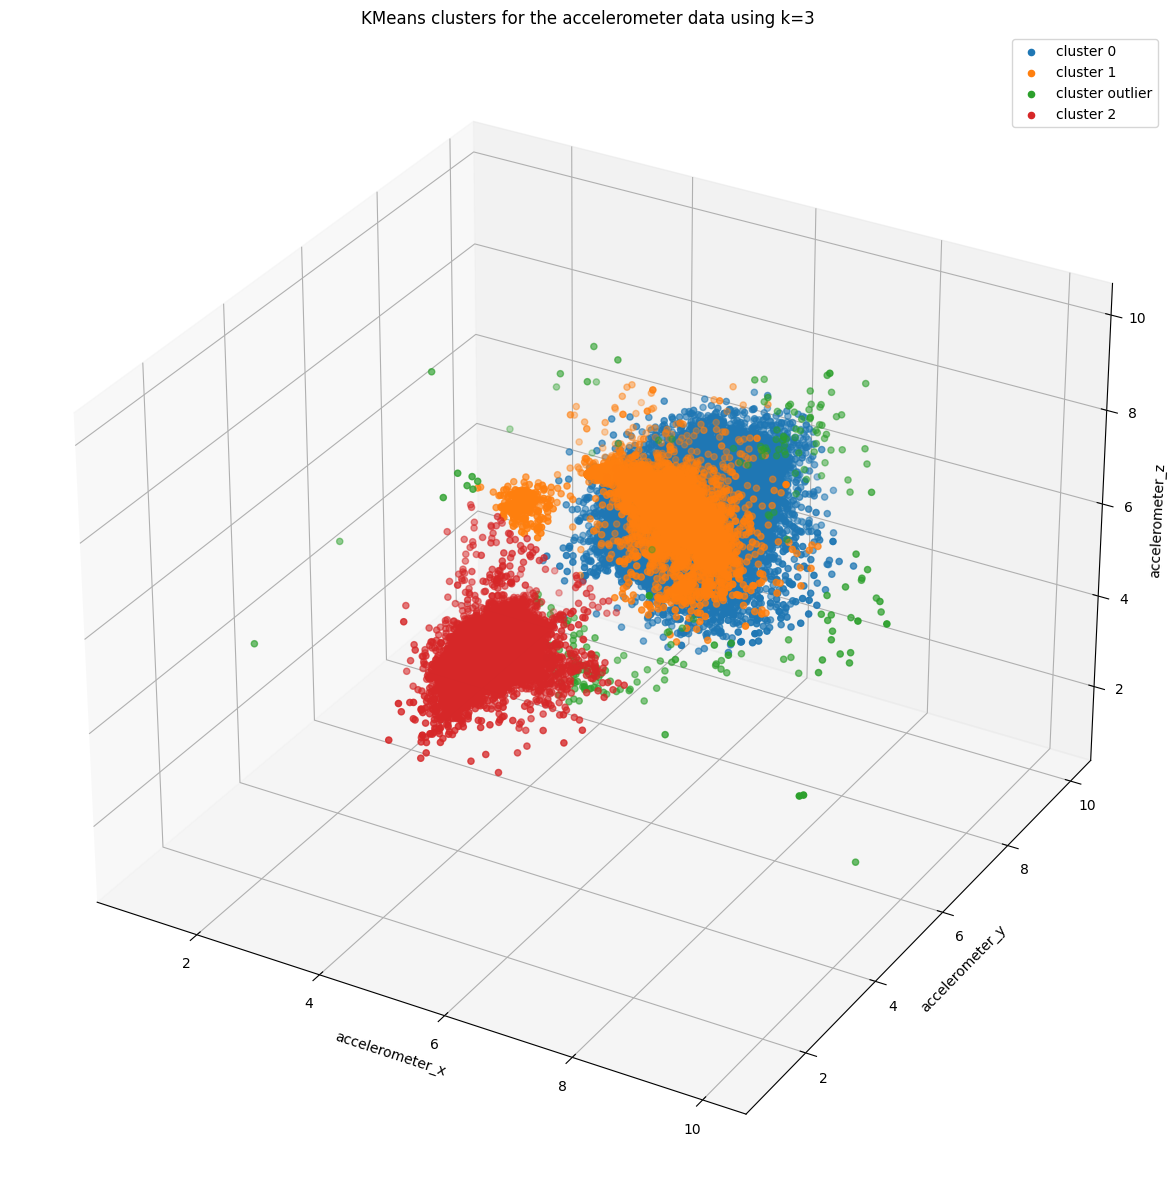

In [18]:
plot_3d(kmeans_acc.data, labels_acc, 'KMeans clusters for the accelerometer data using k=3')

### Gyroscope

In [ ]:
# optimal_k_gyro = best_number_clusters(gyroscope_data, threshold=0.90)
# print('optimal k:', optimal_k_gyro)


Tal como para o acelerómetro, o processo de escolha do melhor K foi realizado utilizando o método o Elbow. 
O resultado final para os dados do giroscópio foi:

![Best number clusters - KMeans - gyroscope data](./results/best_k_gyro.png "Graph with best k - Gyroscope")


Como de pode observar, o número ideal de clusters a utilizar é quatro. 

In [44]:
%%time
kmeans_gyro = KMeans(4)
labels_gyro = kmeans_gyro.predict(gyroscope_data)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
CPU times: total: 1min 34s
Wall time: 2min 53s


In [46]:
labels_gyro = kmeans_gyro.get_labels_with_outliers(2.5)

In [ ]:
# labels_gyro.to_csv('labels_gyro.csv', index=False)

In [50]:
plot_3d(kmeans_gyro.data, labels_gyro, 'KMeans clusters for the gyroscope data using k=4')

<IPython.core.display.Javascript object>

### Magnetometer

In [ ]:
# optimal_k_mag = best_number_clusters(normalize_data(magnetometer_data), threshold=0.85)
# print('optimal k:', optimal_k_mag)

À semelhança dos anteriores o processo de escolha do melhor K foi realizado utilizando o método o Elbow. 
O resultado final para os dados do magnetómetro foi:

![Best number clusters - KMeans - magnetometer data](./results/best_k_mag.png "Graph with best k - Magnetometer")


Como de pode observar, o número ideal de clusters a utilizar é sete. 

In [ ]:
# %%time
# kmeans_mag = KMeans(7)
# labels_mag = kmeans_mag.predict(magnetometer_data)

In [ ]:
# labels_mag = kmeans_mag.get_labels_with_outliers(2.5)

In [ ]:
# labels_mag.to_csv('labels_mag.csv', index=False)

In [ ]:
# %%time
# plot_3d(kmeans_mag.data, labels_mag, 'KMeans cluster for the accelerometer data using k=7')

### DBSCAN

Foi elaborado um estudo semelhante ao anterior, mas agora utilizando o DBSCAN como algoritmo de *unsupervised learning*

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
acc_scan = DBSCAN().fit(accelerometer_data.values)

In [65]:
acc_labels = acc_scan.labels_

## Exercise 3.8 - Add outliers

In [5]:
k = 3
percentage = 0.1

In [6]:
def calculate_density(outliers):
    return outliers.sum() / len(outliers)

In [7]:
def inject_outliers(quantity, data, outliers_indexes, k,  z=1):
    print('inject outliers')
    non_outliers = pd.Series(outliers_indexes[outliers_indexes == False].index)
    indexes = non_outliers.sample(quantity, random_state=42)
    data[indexes] = data[indexes].apply(lambda x :  (data.mean() + k * random.choice([1, -1]) * (data.std() + np.random.uniform(0, z))))
    return data

In [8]:
def add_outliers(percentage, k, data):
    data = data.copy()
    indexes = calculate_outliers_indexes(data, k)
    density = calculate_density(indexes)
    step = 1000
    print(density)
    count = 0
    quantity = int((percentage - density) * len(data))
    print('Quantity:', quantity)
    while density < percentage and count < quantity + step:
        print('Count', count)
        data = inject_outliers(step, data, indexes, k)
        indexes = calculate_outliers_indexes(data, k)
        density = calculate_density(indexes)
        print(density)
        count += step
    return data, density

In [71]:
# plot_zscore_outliers(data, 'accelerometer_module', k_value=k )

In [21]:
series_with_outliers, density = add_outliers(percentage, k, data['accelerometer_module'])

0.02149338340440663
Quantity: 61378
Count 0
inject outliers
0.02206000854414432
Count 1000
inject outliers
0.022606168667548367
Count 2000
inject outliers
0.023206049458828225
Count 3000
inject outliers
0.023758604899836534
Count 4000
inject outliers
0.02437639258040833
Count 5000
inject outliers
0.02493918052958346
Count 6000
inject outliers
0.025533945066779907
Count 7000
inject outliers
0.02603405890343326
Count 8000
inject outliers
0.026568707455149637
Count 9000
inject outliers
0.02712765821376221
Count 10000
inject outliers
0.02765846957491603
Count 11000
inject outliers
0.028189280936069847
Count 12000
inject outliers
0.02874183637707816
Count 13000
inject outliers
0.029216368943314464
Count 14000
inject outliers
0.029763808130239364
Count 15000
inject outliers
0.03031892169828938
Count 16000
inject outliers
0.03083054710663041
Count 17000
inject outliers
0.03129612622822075
Count 18000
inject outliers
0.031823100398812004
Count 19000
inject outliers
0.03233216768011133
Count 20

In [22]:
outliers_data = data.copy()
outliers_data['accelerometer_data'] = series_with_outliers

In [23]:
outliers_data.to_csv('data_with_outliers.csv', index=False)

In [25]:
data['accelerometer_module'].equals(series_with_outliers)

False

Density:  0.8411345181844668
Density:  1.8329326923076923
Density:  0.23699504573170732
Density:  2.5390625
Density:  2.2235576923076925
Density:  0.3635153785488959
Density:  2.994791666666667
Density:  1.837270341207349
Density:  1.069790043877828
Density:  1.2335958005249343
Density:  1.0690754815054155
Density:  1.3123359580052494
Density:  1.3014917355834332
Density:  1.2598425196850394
Density:  1.3587266789979675
Density:  1.2598425196850394


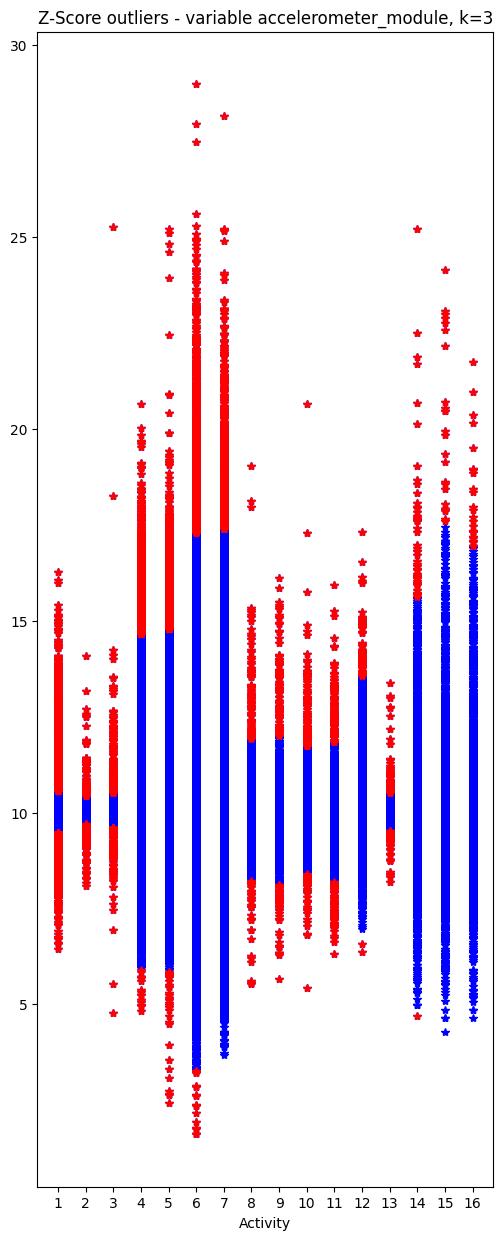

In [24]:
plot_zscore_outliers(outliers_data, 'accelerometer_module', k_value=k )

## Exercise 3.9 - Linear regression

Para calcular o melhor número de valores anteriores (*p*) em que basear as estimativas do modelo de regressão linear, utilizado foram usados os k primeiros valores (não outliers) do dataset, onde k é o índice do primeiro outlier calculado. Estes valores foram usados na técnica do *leave-one-out* para testar o melhor número de p em que basear o modelo. Este teste foi 5 vezes para prever valores diferentes, usando o *RMSE* para calcular a accuracy. O valor de p foi calculado a partir da média dos melhores p obtidos nos testes. Este valor será depois utilizado pelo modelo para estimar todos os outliers

In [9]:
k = 3

In [10]:
outliers_data = pd.read_csv('data_with_outliers.csv')

In [11]:
regressed_acc = outliers_data['accelerometer_module'].copy()
regressed_acc

0         10.053699
1         10.020108
2         10.007578
3          9.958767
4          9.889685
            ...    
781817     9.957928
781818     9.943453
781819     9.942118
781820     9.999824
781821     9.990285
Name: accelerometer_module, Length: 781822, dtype: float64

In [12]:
outliers_indexes = calculate_outliers_indexes(regressed_acc, k)
outliers_indexes

0         False
1         False
2         False
3         False
4         False
          ...  
781817    False
781818    False
781819    False
781820    False
781821    False
Name: accelerometer_module, Length: 781822, dtype: bool

16804

In [13]:
non_outliers_data = outliers_data.loc[outliers_indexes == False]['accelerometer_module']
non_outliers_data

0         10.053699
1         10.020108
2         10.007578
3          9.958767
4          9.889685
            ...    
781817     9.957928
781818     9.943453
781819     9.942118
781820     9.999824
781821     9.990285
Name: accelerometer_module, Length: 765018, dtype: float64

In [24]:
def calculate_alphas(data, p):
    rows = len(data) - p
    cols = p + 1
    x = np.ones((rows, cols))
    for i in range(p):
        x[:, p - i] = data[i : len(data)-p + i]
    x_plus = np.linalg.pinv(x)
    del x
    a = x_plus.dot(data[p:])
    del x_plus
    return a

In [15]:
def predict(data, p, a=None):
    """ receives only the previous points and returns the predicted value based on the previous p points"""
    size = len(data)
    if a is None:
        print('calculate_betas')
        a = calculate_alphas(data, p)
    prev_values = np.ones(p+1)
    prev_values[1:] = data[:size-p-1:-1]
    y_pred = prev_values.dot(a)
    del prev_values
    return y_pred

In [16]:
def rmse (y_real, y_pred):
    """https://www.askpython.com/python/examples/rmse-root-mean-square-error"""
    mse = np.square(y_real - y_pred).mean()
    return np.sqrt(mse)

In [17]:
def define_best_p_value(data, index_first_outlier, min_p_value=10, max_step=100, step=100):
    """Leave one-out technique to determine the best number of previous values to predict a value"""
    p_possible_values = range(min_p_value, max_step, step)
    real_value = data[index_first_outlier]
    errors = []
    for p in p_possible_values:
        d = data[:index_first_outlier]
        y_pred = predict(d, p)
        print('P: ', p)
        print('Real: ', real_value)
        print('Pred: ', y_pred)
        errors.append(rmse(real_value, y_pred))

    
    plt.figure()
    plt.plot(p_possible_values, errors, '*')

    for i in range(len(errors)):
        plt.annotate(errors[i], (p_possible_values[i], errors[i] + 0.2))

    plt.xlabel('Previous p values')
    plt.ylabel('RMSE')
    plt.title('Errors obtained with RMSE using the Leave-one-out technique to determine the best p value')
    plt.show()
    
    return p_possible_values[np.array(errors).argmin()], errors
    

In [18]:
def plot_results(data, p):
    print('Real value:', data[-1])
    y_pred = predict(data[:-1], p)
    print('Predicted value:', y_pred)
    x_axis = np.arange(len(data))
    plt.scatter(x_axis, data, label='real values')
    x_axis_pred = len(data)
    plt.scatter(x_axis_pred, y_pred, color='r', label='predicted values')
    plt.legend()
    plt.show()

### Determine best number of previous value to use in the model

In [91]:
# %%time
# bests = []
# errors_values = []
# init=500
# final = 9000
# step= 500
# for i in range(5):
#     index = np.random.randint(final, first_outlier)
#     print(index)
#     best_p_value, rmses = define_best_p_value(outliers_data['accelerometer_module'], index, init, final, step)
#     print('Best:', best_p_value)
#     bests.append((index, best_p_value))
#     errors_values.append(rmses)

In [92]:
# bests

Verificou-se que os valores ideais rondavam o p=1000, pelo que decidiu-se utilizar um p de 1025.

In [19]:
p_value = 1025
p_value_middle = int(p_value/2)

In [26]:
non_outliers_data.shape

(765018,)

### Calculate alpha matrices to use

Como o calculo das matrixes são muito demoradas, foi calculada inicialmente a matriz a utilizar como os valores não outliers

In [29]:
a = calculate_alphas(non_outliers_data, 1025)

C:\Users\joana\AppData\Local\Temp\ipykernel_9744\143259075.py:6: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.

C:\Users\joana\AppData\Local\Temp\ipykernel_9744\143259075.py:9: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.



In [31]:
a.tofile(os.path.join('results', 'matrix_a.csv'), sep=',')

In [27]:
a_prev = calculate_alphas(non_outliers_data, p_value_middle)

In [32]:
a_prev.tofile(os.path.join('results', 'matrix_a_prev.csv'), sep=',')

In [28]:
a_post = calculate_alphas(non_outliers_data[::-1], p_value_middle)

C:\Users\joana\AppData\Local\Temp\ipykernel_9744\143259075.py:6: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.

C:\Users\joana\AppData\Local\Temp\ipykernel_9744\143259075.py:9: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.



In [33]:
a_post.tofile(os.path.join('results', 'matrix_a_post.csv'), sep=',')

### Predict values based on p previous values

In [36]:
indexes = pd.Series(outliers_data[outliers_indexes].index)

In [41]:
regressed_acc[indexes] = indexes.apply(lambda x: predict(regressed_acc[:x], p_value, a))

In [42]:
regressed_acc.equals(outliers_data['accelerometer_module'])

False

In [43]:
outliers_data['accelerometer_data'] = regressed_acc

In [44]:
outliers_data.to_csv('data_linear_regression.csv', index=False)

Density:  0.8411345181844668
Density:  1.8329326923076923
Density:  0.23699504573170732
Density:  2.5390625
Density:  2.2235576923076925
Density:  0.3635153785488959
Density:  2.994791666666667
Density:  1.837270341207349
Density:  1.069790043877828
Density:  1.2335958005249343
Density:  1.0690754815054155
Density:  1.3123359580052494
Density:  1.3014917355834332
Density:  1.2598425196850394
Density:  1.3587266789979675
Density:  1.2598425196850394


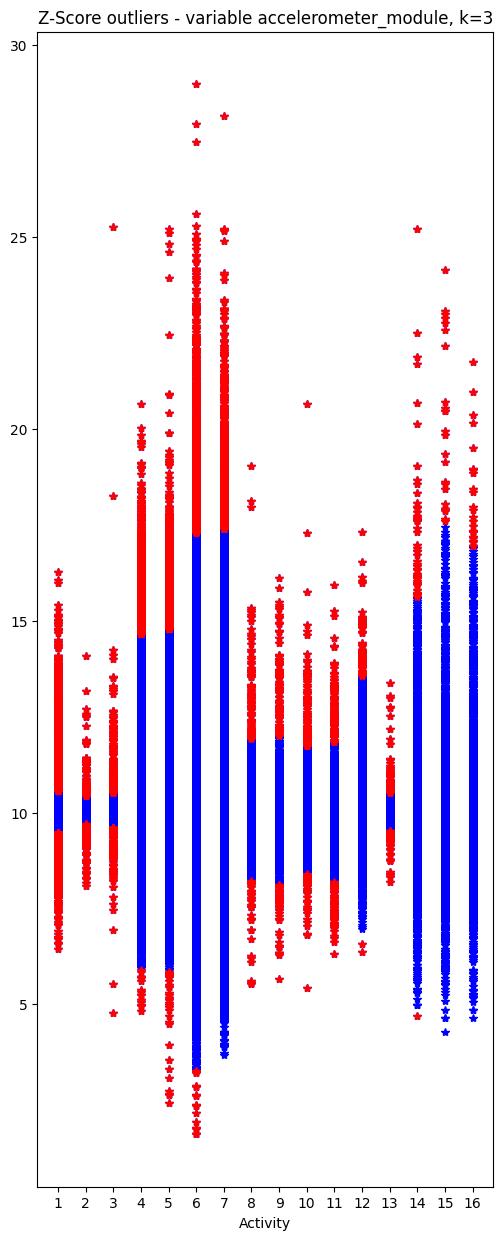

In [45]:
plot_zscore_outliers(outliers_data, 'accelerometer_module', k_value=k )

### Predict values based on previous and next values

In [57]:
def predict_in_the_middle(data_all, p, split_index, a_pred, a_post):
    # if split_index == len(data_all)-1:
    #     # predict the last index of the data
    #     return predict(data_all[:-1], p, a_prev)
    # if split_index == 0:
    #     # predict the first index of the data
    #     return predict(data_all[1:][::-1], a_post)
    # if split_index < p + 1:
    #     return predict(data_all[:split_index], split_index-1)
    # if len(data_all) - split_index - 1< p + 1:
    #     return predict(data_all[:split_index], p)
    prev_data = data_all[:split_index]
    post_data = data_all[split_index+1:]

    prev_pred = predict(prev_data, p, a_pred)
    post_pred = predict(post_data[::-1], p, a_post)

    return (prev_pred + post_pred) / 2 # mean of the two predictions


In [58]:
def predict_data_middle(data, k, p, a_pred, a_post):
    data = data.copy()
    outliers_indexes = calculate_outliers_indexes(data, k)
    indexes = pd.Series(data[outliers_indexes].index)
    del outliers_indexes
    data[indexes] = indexes.apply(lambda x: predict_in_the_middle(data, p, x, a_pred, a_post))
    return data

In [59]:
outliers_data = pd.read_csv('data_with_outliers.csv')

In [60]:
data_predicted_in_middle = predict_data_middle(outliers_data['accelerometer_module'], 3, p_value_middle, a_prev, a_post)

C:\Users\joana\AppData\Local\Temp\ipykernel_9744\3283218449.py:8: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.



In [61]:
data_predicted_in_middle.equals(outliers_data['accelerometer_module'])

False

## Exercise 4.1 - Statistical significance - control the risk

In [ ]:
# from scipy.stats import kstest
# from scipy.stats import norm

Nos resultados apresentados a seguir, foi utilizado um *threshold* the 5% no teste de Kolgomorov-Smirov para que o p-value de forma a aceitar a distribuição das variáveis como normal.

In [ ]:
# def ks_test(data, variable, threshold=0.05):
#     # check if the activities have a normal (gaussian distribution)
#     # https://www.statology.org/plot-normal-distribution-python/
#     plt.figure()
#     plt.title(f'{variable} distribution')
#     for activity in data['activity'].unique():
#         #divide data by activitis to check the normallity
#         activity_data = data[data['activity'] == activity][variable]
#         statistics, p_value = kstest(activity_data, norm.cdf)
#         if p_value < threshold:
#             print(f'Variable {variable} - activitiy {activities_labels[activity]}: Reject normal distributions | p-value={p_value}')
#         else:
#             print(f'Variable {variable} - activitiy {activities_labels[activity]}: Normal distribution | p-value={p_value}')
#         activity_data.hist(alpha=0.4, label=activities_labels[activity])
        
#     plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
#     plt.show()
                             

In [ ]:
# accelerometer_mod_data = right_wrist_data[['accelerometer_module', 'activity']]
# gyroscope_mod_data = right_wrist_data[['gyroscope_module', 'activity']]
# magnetometer_mod_data = right_wrist_data[['magnetometer_module', 'activity']]

In [ ]:
# ks_test(accelerometer_mod_data, 'accelerometer_module')

Como se pode observar, apesar de histogramas do módulo do vetor de aceleração parecerem seguir uma distribuição normal, todos têm p-value inferior ao minimo necessário para aceitar a hipótese nula, logo não segue uma distribuição normal.

In [ ]:
# ks_test(gyroscope_mod_data, 'gyroscope_module')

Como se pode observar pela distribuição e pelo p-value, o módulo do vetor giroscópio não segue uma distribuição gaussiana.

In [ ]:
# ks_test(magnetometer_mod_data, 'magnetometer_module')

Pela observação so gráfico e pelo valor obtido no p-value concluí-mos que o módulo do vetor do magnómetro não segue uma distribuição normal.

Em todas as variáveis, notou-se o que valor resultante do p-value usando o teste de Kolmogorov-Smirnov é nulo, ou perto disso. Assim, conclí-mos que nenhum dos vetores segue uma distribuição normal.

Em suma:

- os módulos dos vetores não seguem uma distribuição normal/gaussiana pelo que temos de escolher um teste não-paramétrico (apesar de termos um dimensão bastante elevada de valores de input)
- temos 3 variáveis (x, y, e, z de cada vetor) numéricas como valor de input que estão emparelhadas entre si
 
Assim, segundo o *Choosing Statistical Tests* (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2881615/), escolhemos o teste de Friedman para calcular a significância estatística das variáveis.

In [ ]:
# from scipy.stats import friedmanchisquare

In [ ]:
# def friedman_test(data, variables, threshold=0.05):
#     # https://www.statology.org/friedman-test-python/
#     # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.friedmanchisquare.html

#     # null-hypothesis: all variables have the same probability (mean)
#     # at least one variable has a different probability

#     x = data[variables[0]]
#     y = data[variables[1]]
#     z = data[variables[2]]

#     for activity in data['activity'].unique():
#         act_x = x[data['activity'] == activity]
#         act_y = y[data['activity'] == activity]
#         act_z = z[data['activity'] == activity]

#         statistic, pvalue = friedmanchisquare(act_x, act_y, act_z)

#         if pvalue < threshold:
#             print(f"Activity {activities_labels[activity]} - Samples don't have the same distribution | p-value={pvalue}")
#         else:
#             print(f"Activity {activities_labels[activity]} - Samples have the same distribution | p-value={pvalue}")


In [ ]:
# var = 'accelerometer'
# friedman_test(data[[f'{var}_x', f'{var}_y', f'{var}_z', 'activity']], [f'{var}_x', f'{var}_y', f'{var}_z'])

In [ ]:
# var = 'gyroscope'
# friedman_test(data[[f'{var}_x', f'{var}_y', f'{var}_z', 'activity']], [f'{var}_x', f'{var}_y', f'{var}_z'])

In [ ]:
# var = 'magnetometer'
# friedman_test(data[[f'{var}_x', f'{var}_y', f'{var}_z', 'activity']], [f'{var}_x', f'{var}_y', f'{var}_z'])

Como se pode observar, o p-value resultante do teste de Friedman para todas os vetores e actividades, é sempre nulo, pelo que rejeitamos a hipótese de que os dados seguem a mesma distribuição.

## Exercise 4.2 - feature extraction

Após ler o artigo *A Feature Selection-Based Framework for Human Activity
Recognition Using Wearable Multimodal Sensors* (https://www.semanticscholar.org/paper/A-feature-selection-based-framework-for-human-using-Zhang-Sawchuk/d67fa24e9877b0773e76af259441278ee3cf8bc4?p2df), verificou-se que seria necessário recolher features estatísticas e físicas. Seguindo o que os autores fizeram, apenas serão utilizados do dados da perna direita (device_id_id = 4) na extração das features.

**Features Estatísticas**

As features calculadas serão: 
- média
- mediana
- desvio padrão
- variância
- RMS - root mean square
- média das derivadas
- intervalo inter-quartile
- zero crossing rate
- mean crossing rate
-  spectral entropy


**Features Físicas**

As features físicas utilizadas serão: 
- média da intensidade de movimento (AI) - apenas para o vetor de aceleração
- variância da intensidade do movimento (VI) - apenas para o vetor de aceleração
- área normalizada da magnitude do sinal (SMA) - apenas para o vetor de aceleração
- eigenvalues da direção dominante no vetor de aceleração (EVA)
- correlação entre direção da gravidade e as restantes direções no vetor de aceleração  (CAGH)
- média da velocidade ao longo do direção - (AVH)
- média da velocidade ao longo da direção da gravidade (AVG)
- média da rotação dos ângulos dada a direção da gravidade (ARATG)
- frêquencia dominante em cada vetor direção (DF)
- energia de cada vetor direção (Energy)
- média da energia da aceleração (AAE)
- média da energia da rotação (ARE)


In [21]:
sensors_columns = [
    'accelerometer_x', 'accelerometer_y', 'accelerometer_z',
    'gyroscope_x', 'gyroscope_y', 'gyroscope_z',
    'magnetometer_x', 'magnetometer_y', 'magnetometer_z',
]


In [22]:
# select rows
device_id = 4 # Right Thigh
sensors_data = get_device_data(data_with_features, device_id)[sensors_columns]

### Frequency
Segundo o README do dataset, as amostas foram recolhidas a uma frequencia de amostraggem de 51.2 Hz

In [23]:
fs = 51.2
t = 1 / fs

### Window size and overlap

De forma a evitar o aliasing, iremos calcular as features por janela, sendo que iremos usar um tamanho de janela de 3 periodos e uma sobreposição de 60%

In [24]:
window_periods = 3
window_size = int(window_periods / t)
overlap = 0.6
step = int(window_size * overlap)

In [25]:
from scipy import stats

In [26]:
from scipy.fft import fft

In [91]:
from scipy.signal import periodogram
def spectral_entropy(data, freq):
    # from https://towardsdatascience.com/anomaly-detection-in-univariate-stochastic-time-series-with-spectral-entropy-834b63ec9343
    _, spec_density = periodogram(data, freq, nfft=None)
    spec_density_norm = spec_density / np.sum(spec_density)
    entropy = np.nansum(spec_density_norm * np.log2(spec_density_norm))
    res = -(entropy / np.log2(spec_density_norm.size))
    return res

In [92]:
def extract_statistical_features(data):
    """Receives a dataframe of a given window and returns the statistical features extracted"""
    df = pd.DataFrame()
    for column in data.columns:
        df[f'{column}_mean'] = [data[column].mean()]
        # mean
        # median
        df[f'{column}_median'] = [data[column].median()]
        # Std
        df[f'{column}_std'] = [data[column].std()]
        # variance
        df[f'{column}_variance'] = [data[column].var()]
        # Root mean square
        df[f'{column}_rms'] = [np.sqrt((data[column] ** 2).mean())]
        # average derivatives
        # Skewness
        df[f'{column}_skewness'] = [data[column].skew()]
        # kurtosis
        df[f'{column}_kurtosis'] = [data[column].kurtosis()]
        # Interquartile range
        df[f'{column}_interquantile'] = [stats.iqr(data[column])]
        # zero crossing rate
        df[f'{column}_non_crossing_rate'] = [len(np.nonzero(np.diff(data[column] > 0))[0])] # https://www.folkstalk.com/tech/zero-crossing-rate-python-with-code-examples/
        # mean crossing rate
        aux = data[column] - data[column].mean() # to centre in zero
        df[f'{column}_mean_crossing_rate'] = [len(np.nonzero(np.diff(aux > 0))[0])]
        # TODO: pairwise correlation
        # spectral entropy
        df[f'{column}_spectral_entropy'] = [spectral_entropy(data[column], fs)]

    return df

In [93]:
# Physical features
def mi(data):
    return np.sqrt((data**2).sum(axis=1))

def ai(mi_data):
    return mi_data.mean()

def vi(mi_data):
    return mi_data.var()

def sma(data):
    return np.sum(data.abs().sum()) / len(data)

def eva(data):
    cov_data = data.cov()
    eigenvalues, _ = np.linalg.eig(cov_data)
    return eigenvalues[0], eigenvalues[1]

def cagh(data):
    """Accelemeter data"""
    norm = np.sqrt((data ** 2).sum(axis=1))
    coef = np.corrcoef(data['accelerometer_x'], norm)
    return coef[0, 1]

def avh(data, time):
    """Accelemeter data"""
    velo_y = data['accelerometer_y'].mean() * time
    velo_z = data['accelerometer_z'].mean() * time
    return np.sqrt(velo_y **2 + velo_z**2)

def avg(data):
    """Accelemeter data"""
    return np.trapz(data['accelerometer_x'])

def aratg(data):
    """Gyroscope data """
    aux = data['gyroscope_x'].sum() / len(data)
    return aux

def dominant_frequency(data):
    return np.argmax(fft(data.to_numpy())**2)

def energy(data):
    return np.sum(np.abs(fft(data.to_numpy()))**2) / len(data)

In [94]:
def extract_physical_all(data):
    """ Extracts the features das include the 3 vector, receive a dataframe in a given window that has acc, gyro, mag, xyz values """
    df = pd.DataFrame()
    for column in data.columns:
        # dominant frequency
        df[f'{column}_df'] = [dominant_frequency(data[column])]
        df[f'{column}_energy'] = [energy(data)]
        
    return df

In [95]:
accelerometer_columns = ['accelerometer_x', 'accelerometer_y', 'accelerometer_z']
gyroscope_columns = ['gyroscope_x', 'gyroscope_y', 'gyroscope_z']

In [142]:
def extract_physical_features(data):
    """Receives the data containing the sensors accelerometer, gyroscope, magnetometer"""
    df = extract_physical_all(data)
    # MI - movement intensity - independent od the orientation not used
    mi_values = mi(data[accelerometer_columns])
    # eigenvalues of dominant directions
    eva_values = eva(data[accelerometer_columns])
    # AI - MI mean
    df['ai'] = [ai(mi_values)]
    # VI - MI variance
    df['vi'] = [vi(mi_values)]
    # SMA - normalized signal magnitude area
    df['sma'] = [sma(data)]
    # EVA - eigenvalues of dominant directions
    df['eva_1'] = [eva_values[0]]
    df['eva_2'] = [eva_values[1]]
    # CAGH - correlation between acceleration along gravity and heading directions
    df['cagh'] = [cagh(data[accelerometer_columns])]
    # AVH - averaged velocity along heading direction
    df['avh'] = [avh(data[accelerometer_columns], window_periods)]
    # AVG - averaged velocity along gravity direction
    df['avg'] = [avg(data[accelerometer_columns])]
    # ARATG - average rotation angles related to gravity direction
    df['aratg'] = [aratg(data[gyroscope_columns])]
    # AAE averaged acceleration energy
    df['aae'] = np.mean([df['accelerometer_x_energy'], df['accelerometer_y_energy'], df['accelerometer_z_energy']])
    # ARE - averaged rotation energy
    df['are'] = np.mean([df['gyroscope_x_energy'], df['gyroscope_y_energy'], df['gyroscope_z_energy']])
    
    return df
    

In [143]:
def extract_features(data):
    """ Receives the original data and returns the extracted physical and statistical features"""
    physical_dataframes = []
    statistical_dataframes = []
    count = 0
    # d.rolling(3, step=1, axis=0).apply(lambda x: func(x))
    for i in range(window_size, len(data), step):
        physical_dataframes.append(extract_physical_features(data.iloc[i-window_size:i, :]))
        statistical_dataframes.append(extract_statistical_features(data.iloc[i-window_size:i, :]))
        count += 1
    print(count)
    physical = pd.concat(physical_dataframes)
    statistical = pd.concat(statistical_dataframes)
    
    return pd.concat([statistical, physical], axis=1)

In [98]:
%%time
extracted_data = extract_features(sensors_data)

C:\Users\joana\AppData\Local\Temp\ipykernel_9888\1716187767.py:6: RuntimeWarning:

divide by zero encountered in log2

C:\Users\joana\AppData\Local\Temp\ipykernel_9888\1716187767.py:6: RuntimeWarning:

invalid value encountered in multiply

C:\Users\joana\AppData\Local\Temp\ipykernel_9888\1716187767.py:6: RuntimeWarning:

divide by zero encountered in log2

C:\Users\joana\AppData\Local\Temp\ipykernel_9888\1716187767.py:6: RuntimeWarning:

invalid value encountered in multiply

C:\Users\joana\AppData\Local\Temp\ipykernel_9888\1716187767.py:6: RuntimeWarning:

divide by zero encountered in log2

C:\Users\joana\AppData\Local\Temp\ipykernel_9888\1716187767.py:6: RuntimeWarning:

invalid value encountered in multiply

C:\Users\joana\AppData\Local\Temp\ipykernel_9888\1716187767.py:6: RuntimeWarning:

divide by zero encountered in log2

C:\Users\joana\AppData\Local\Temp\ipykernel_9888\1716187767.py:6: RuntimeWarning:

invalid value encountered in multiply

C:\Users\joana\AppData\Local\Temp\ip

8763
CPU times: total: 6min 46s
Wall time: 10min 3s


In [99]:
features_path = 'extracted_features.csv'

In [100]:
# extracted_data.columns[extracted_data.dtypes == 'object']

In [101]:
extracted_data.to_csv(features_path, index=False)

In [119]:
extracted_data.isnull().values.any()

False

## Exercise 4.3 - PCA

Para saber como utilizar o PCA do sklearn, foi utilizado *Müller Andreas C & Guido S. (2017). Introduction to machine learning with python : a guide for data scientists (First). O'Reilly Media*

Após verificar que se gerariam muitos principal components (PC), foi limitado este número para apenas 10, uma vez notou em testes anteriores que o PC1 e PC2 é que seriam mais significativos, sendo os restantes muito perto de zero.

In [102]:
features_data = pd.read_csv(features_path)

In [103]:
features_data

,accelerometer_x_mean,accelerometer_x_median,accelerometer_x_std,accelerometer_x_variance,accelerometer_x_rms,accelerometer_x_skewness,accelerometer_x_kurtosis,accelerometer_x_interquantile,accelerometer_x_non_crossing_rate,accelerometer_x_mean_crossing_rate,...,vi,sma,eva_1,eva_2,cagh,avh,avg,aratg,aae,are
0,-0.642723,-0.64332,0.031736,0.001007,0.643501,0.811005,2.106681,0.037200,0,55,...,0.000427,14.184426,0.003400,0.000949,-0.111964,29.607042,-97.701675,-0.510029,912.749648,912.749648
1,-0.617430,-0.61705,0.047394,0.002246,0.619235,0.065527,-0.246491,0.072620,0,23,...,0.000403,14.728422,0.003090,0.001914,-0.078042,29.612825,-93.842480,-0.693125,924.541628,924.541628
2,-0.562038,-0.56780,0.047931,0.002297,0.564065,0.449393,0.305932,0.063130,0,22,...,0.000421,14.609970,0.005495,0.001166,-0.203208,29.622459,-85.458885,-0.759822,920.394998,920.394998
3,-0.522878,-0.51853,0.037411,0.001400,0.524206,-0.281782,1.495168,0.037330,0,57,...,0.000492,14.321906,0.002841,0.001069,-0.130622,29.631119,-79.415850,-0.740436,912.961554,912.961554
4,-0.537807,-0.53994,0.037037,0.001372,0.539072,-0.168640,0.463512,0.045750,0,45,...,0.000659,14.778338,0.013217,0.001047,-0.130391,29.636981,-81.757330,-0.975190,927.023385,927.023385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,0.144423,0.14169,0.029543,0.000873,0.147395,0.033574,-0.293624,0.036730,0,31,...,0.000402,13.800449,0.002634,0.000828,0.006160,29.716591,21.944510,-0.498909,907.499975,907.499975
8759,0.130531,0.13001,0.025618,0.000656,0.133005,0.084827,-0.441324,0.044290,0,36,...,0.000402,13.483011,0.002424,0.000642,0.184104,29.713107,19.843318,-0.579662,902.395144,902.395144
8760,0.113802,0.10762,0.023492,0.000552,0.116185,0.240974,-0.455046,0.035989,0,35,...,0.000374,13.154183,0.002076,0.000552,0.155881,29.714514,17.293436,-0.575142,897.344611,897.344611
8761,0.115606,0.11737,0.021704,0.000471,0.117613,-0.197862,-0.705024,0.026510,0,40,...,0.000295,13.082712,0.003239,0.000463,0.107778,29.714665,17.594971,-0.406519,896.775060,896.775060


In [104]:
features_data.shape

(8763, 128)

O dataset de features extraidas contém 119 features diferentes que representam o dataset original.

In [105]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [106]:
scaled_data = StandardScaler().fit_transform(features_data)

In [107]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

In [108]:
# calculate percentage variation of each principal component 
percentage_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)

In [109]:
# labels of each principal component
labels_pca = [f'PC{x}' for x in range(1, len(percentage_var) + 1)]

In [110]:
def plot_pc(labels_pca, percentage_var, title='Percentage of explained variance in dataset of each Principal Component'):
    plt.figure(figsize=(20, 16))
    plots = sns.barplot(x='Principal Component', y='Percentage of explained varience',  
                        data={'Principal Component' : labels_pca, 
                            'Percentage of explained varience': percentage_var})
    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.1f'),
                    (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                    size=15, xytext=(0, 8),
                    textcoords='offset points')
    plt.xlabel('Principal Component (PC)')
    plt.ylabel('Percentage of explained variance')
    plt.title(title)
    plt.show()

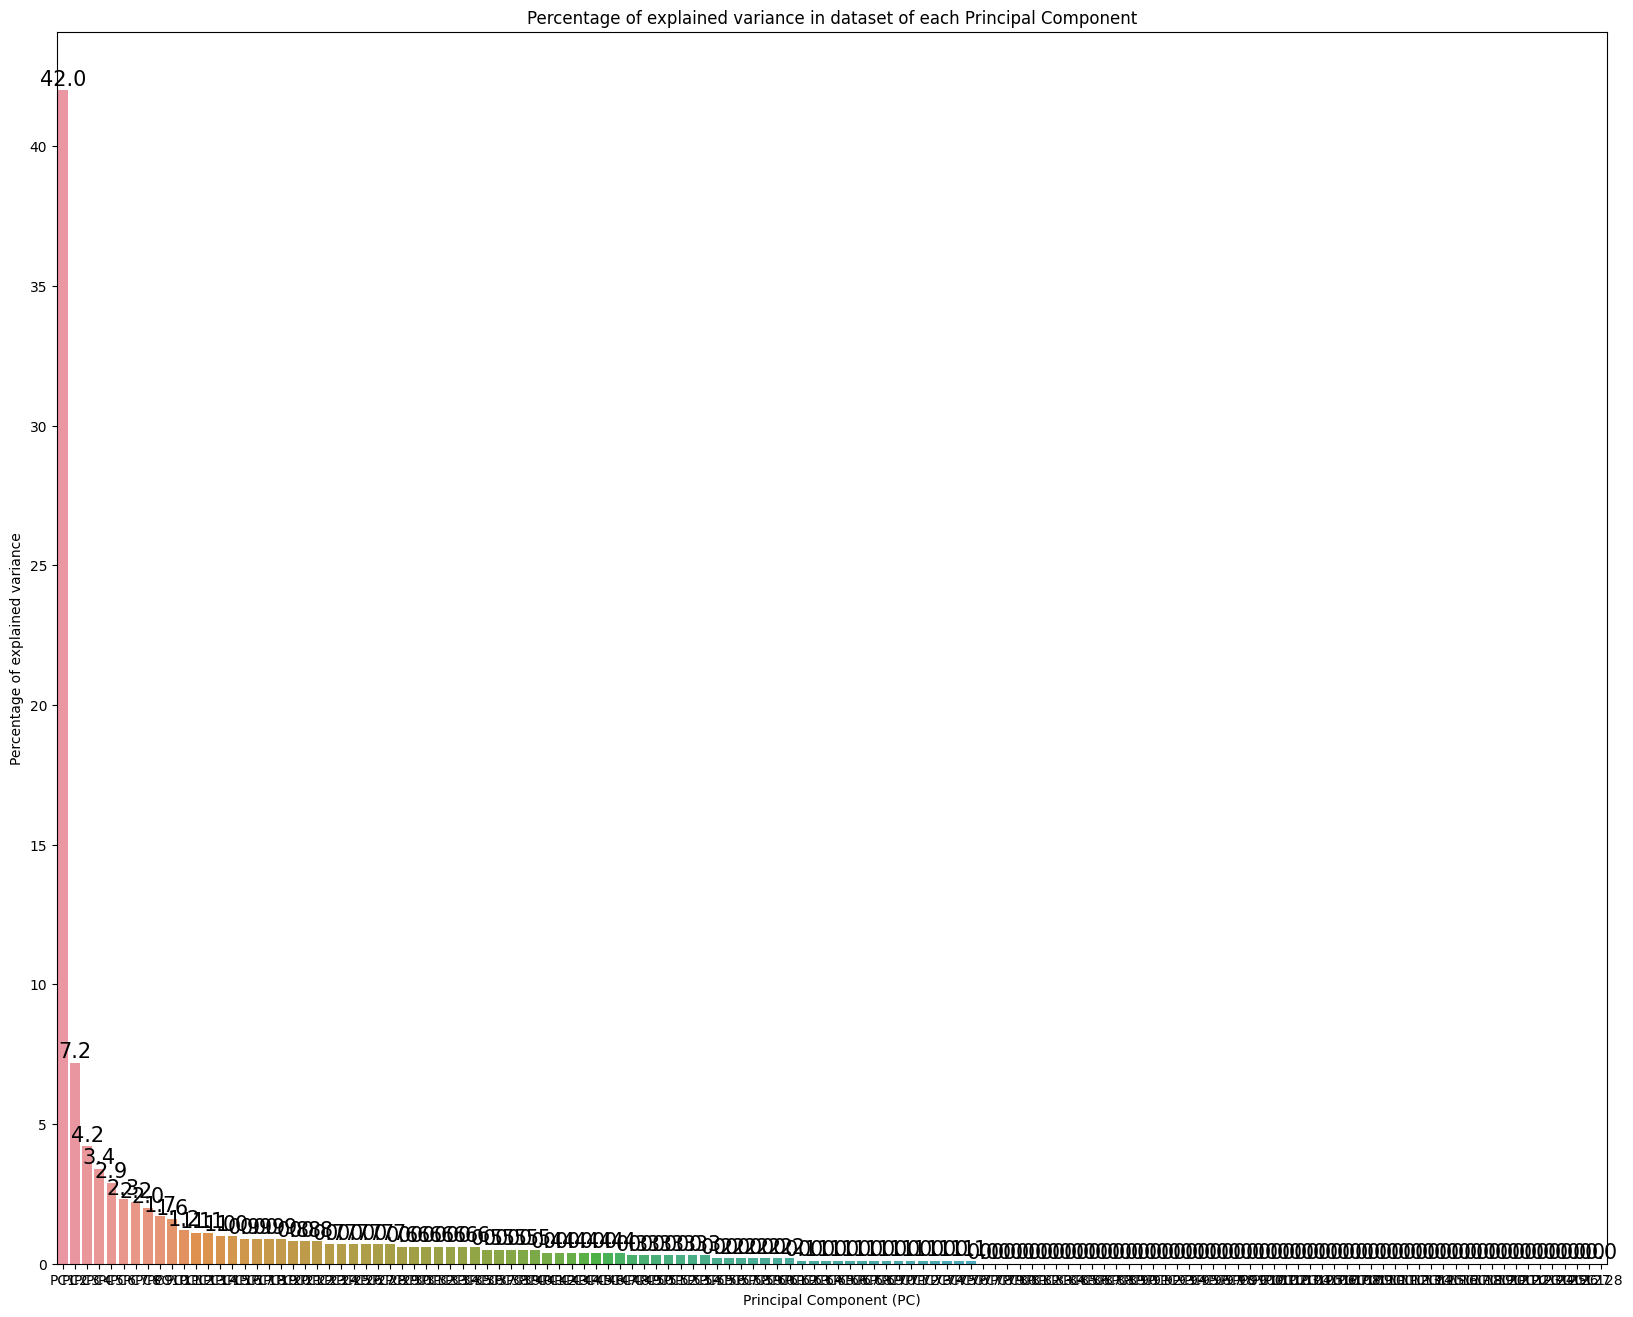

In [111]:
plot_pc(labels_pca, percentage_var)

In [112]:
print('Principal components to achieve at least 75% of explained variance:')
cumulative_sum = np.cumsum(percentage_var)
relevant_pc = np.argmax(cumulative_sum >= 75)
labels_pca[:relevant_pc]

Principal components to achieve at least 75% of explained variance:


['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14',
 'PC15']

Como de pode observar, a componente que melhor descreve o dataset é a componente PC1, descrevendo 36.5% dos dados. Para conseguir descrever pelo menos 75% dos dados são necessários os primeiros 15 principal components

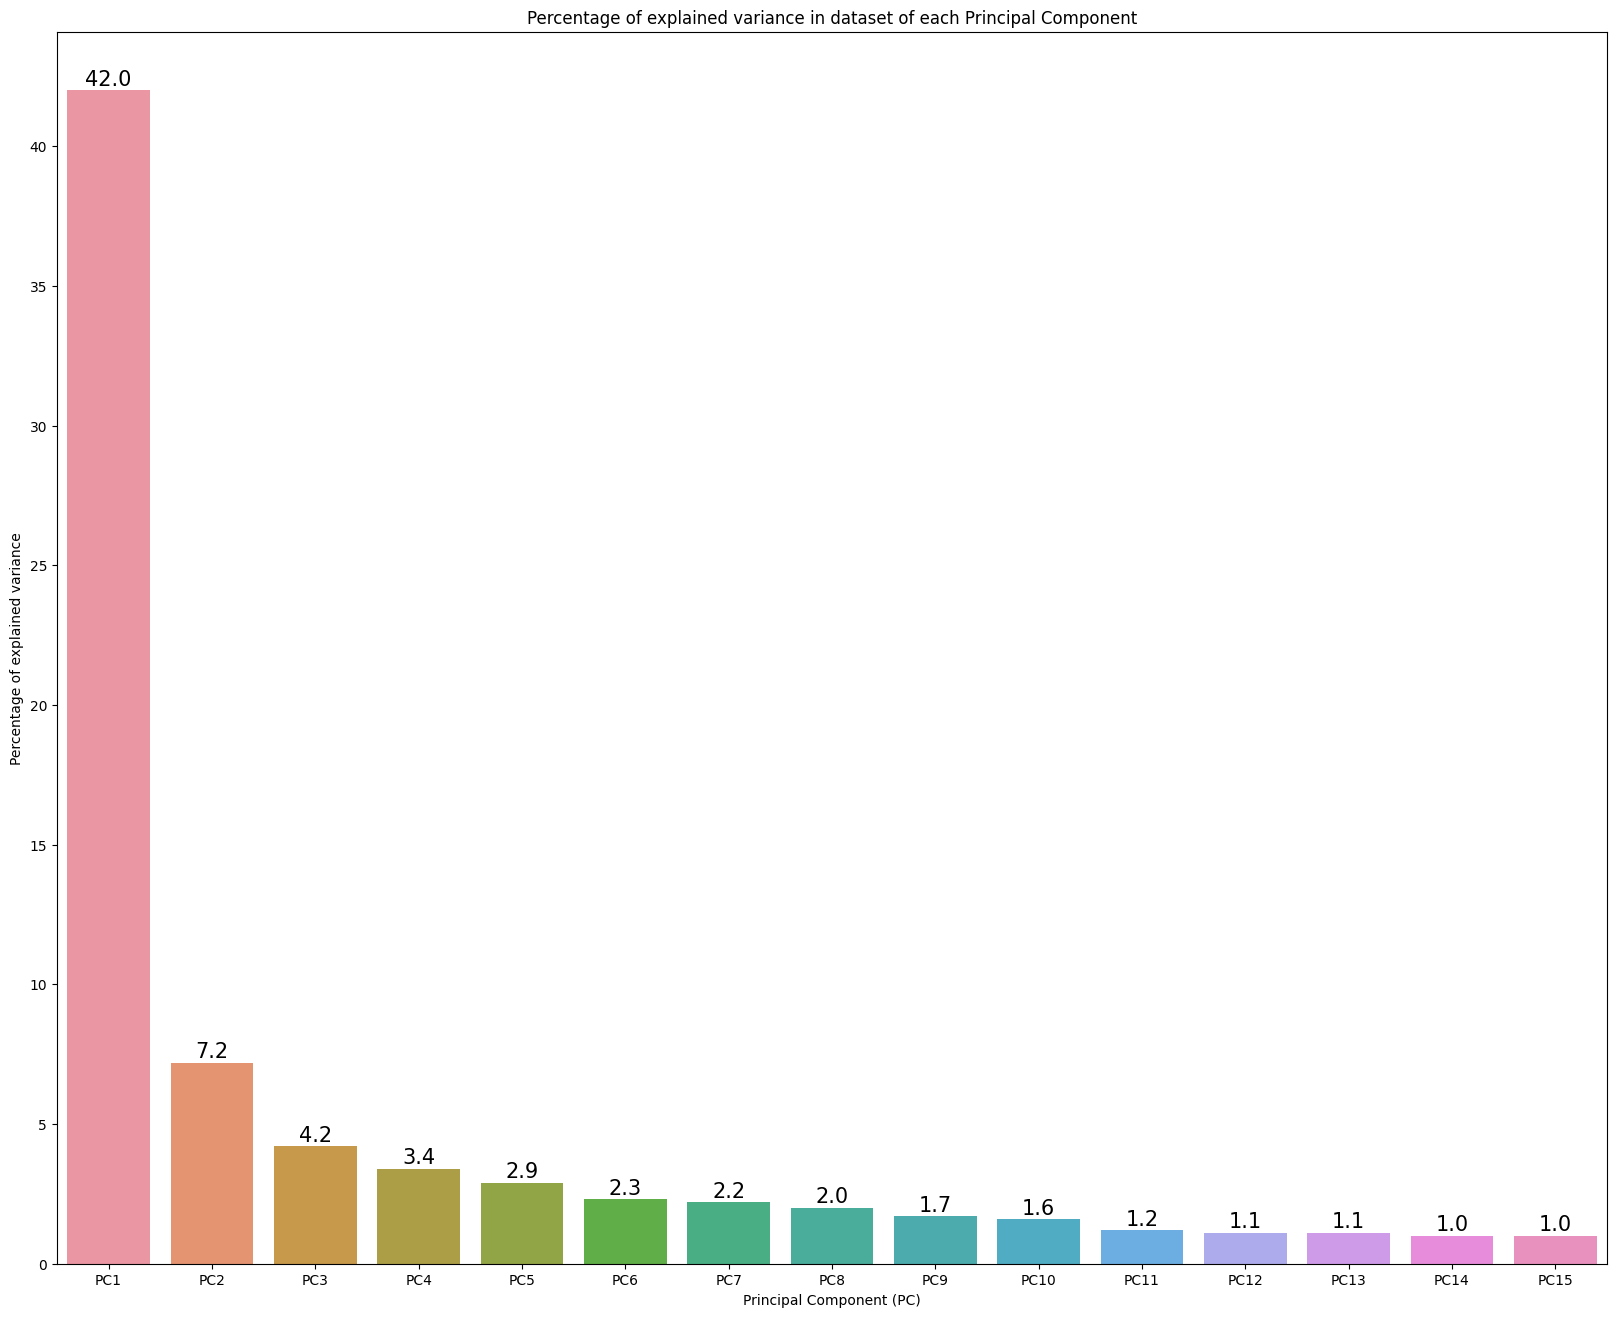

In [113]:
plot_pc(labels_pca[:relevant_pc], percentage_var[:relevant_pc])

In [114]:
pca_dataframe = pd.DataFrame(pca.components_.T, index=features_data.columns, columns=labels_pca)
pca_dataframe

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC119,PC120,PC121,PC122,PC123,PC124,PC125,PC126,PC127,PC128
accelerometer_x_mean,0.019450,0.029401,0.094189,-0.378240,0.057878,-0.091793,0.181877,0.106021,0.155320,0.106978,...,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00
accelerometer_x_median,0.024224,0.023946,0.107135,-0.371339,0.057950,-0.092125,0.174972,0.083316,0.158518,0.123851,...,4.507841e-16,-1.824655e-15,6.082765e-17,1.369449e-16,-3.562583e-16,3.840726e-16,7.087131e-17,-3.307312e-18,1.371562e-16,1.737351e-16
accelerometer_x_std,0.130201,0.037969,-0.020577,-0.003908,0.025993,0.012827,0.035964,-0.068905,-0.033237,-0.014684,...,-7.852550e-18,5.336479e-16,-5.241992e-16,6.196867e-16,1.359000e-16,-7.567632e-16,-3.670491e-16,1.158232e-16,-5.992892e-17,-5.062585e-16
accelerometer_x_variance,0.118232,0.071112,-0.072997,0.007715,0.024902,0.051192,0.066196,-0.049514,-0.023799,0.015454,...,2.410006e-16,-3.665804e-16,1.799038e-16,-3.286522e-16,1.623436e-18,2.696351e-16,9.888364e-17,-8.080419e-17,4.988335e-17,2.745321e-16
accelerometer_x_rms,0.084131,0.122243,0.043818,-0.124637,0.049336,-0.003876,0.058611,-0.022819,0.017719,0.083850,...,-3.412143e-17,6.167987e-17,8.693532e-17,1.765999e-17,-3.573355e-17,1.350112e-17,8.648454e-17,8.005724e-17,3.519168e-17,1.203588e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
avh,-0.033280,0.011877,-0.261727,-0.007107,0.000340,-0.125985,-0.034357,-0.219096,-0.021917,-0.205347,...,-9.770736e-17,1.235646e-17,1.294075e-16,-1.505131e-17,4.229579e-18,-5.071290e-17,4.960379e-17,7.657164e-17,3.908888e-17,-1.197371e-17
avg,0.019463,0.029429,0.094136,-0.378221,0.057901,-0.091786,0.181880,0.106068,0.155343,0.106975,...,-5.115947e-16,1.861407e-15,-6.974775e-17,-1.179272e-16,3.676531e-16,-3.898008e-16,-5.325688e-17,1.732376e-17,-1.187295e-16,-1.921394e-16
aratg,-0.028803,-0.027377,0.020805,-0.010479,0.027550,-0.237818,0.064836,0.074466,-0.482775,0.276415,...,4.528990e-01,3.772149e-01,-1.890309e-01,3.758920e-02,-5.450410e-03,1.055958e-02,2.555899e-02,-1.409508e-02,-4.010621e-03,6.067631e-03
aae,0.128505,0.078476,-0.065847,0.004061,-0.018013,0.002188,-0.025199,0.028322,0.049106,0.032237,...,2.254317e-01,-4.609131e-01,2.703358e-01,-4.844743e-01,-1.972987e-01,-2.848814e-01,-1.307686e-01,-1.141384e-01,5.931388e-02,3.260970e-02


In [115]:
pca_dataframe_relevant = pca_dataframe.loc[:, pca_dataframe.columns[:relevant_pc]]
pca_dataframe_relevant

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
accelerometer_x_mean,0.019450,0.029401,0.094189,-0.378240,0.057878,-0.091793,0.181877,0.106021,0.155320,0.106978,-0.060706,-0.069265,-0.044763,-0.021003,-0.008022
accelerometer_x_median,0.024224,0.023946,0.107135,-0.371339,0.057950,-0.092125,0.174972,0.083316,0.158518,0.123851,-0.053314,-0.058352,-0.042566,-0.042637,-0.012364
accelerometer_x_std,0.130201,0.037969,-0.020577,-0.003908,0.025993,0.012827,0.035964,-0.068905,-0.033237,-0.014684,0.001155,0.032692,-0.009053,-0.019622,0.002490
accelerometer_x_variance,0.118232,0.071112,-0.072997,0.007715,0.024902,0.051192,0.066196,-0.049514,-0.023799,0.015454,-0.015418,0.028888,-0.020473,-0.064758,0.012409
accelerometer_x_rms,0.084131,0.122243,0.043818,-0.124637,0.049336,-0.003876,0.058611,-0.022819,0.017719,0.083850,0.002965,0.129793,0.079474,-0.065288,-0.018350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
avh,-0.033280,0.011877,-0.261727,-0.007107,0.000340,-0.125985,-0.034357,-0.219096,-0.021917,-0.205347,-0.090900,-0.096517,-0.145214,0.068565,0.005908
avg,0.019463,0.029429,0.094136,-0.378221,0.057901,-0.091786,0.181880,0.106068,0.155343,0.106975,-0.060580,-0.069346,-0.044715,-0.021195,-0.008176
aratg,-0.028803,-0.027377,0.020805,-0.010479,0.027550,-0.237818,0.064836,0.074466,-0.482775,0.276415,0.078067,-0.046987,-0.021359,-0.117467,0.117685
aae,0.128505,0.078476,-0.065847,0.004061,-0.018013,0.002188,-0.025199,0.028322,0.049106,0.032237,0.004060,-0.032881,0.005771,-0.018110,0.034039


In [116]:
def plot_relevance(dataframe, relevant=None):
    plt.figure(figsize=(20, 30))
    sns.heatmap(dataframe, cmap='viridis',linewidths=0.3, annot=True)
    plt.xlabel('Principal components')
    plt.ylabel('Feature')
    plt.title(f'Relevance each feature in the first {relevant} principal components')
    plt.show()

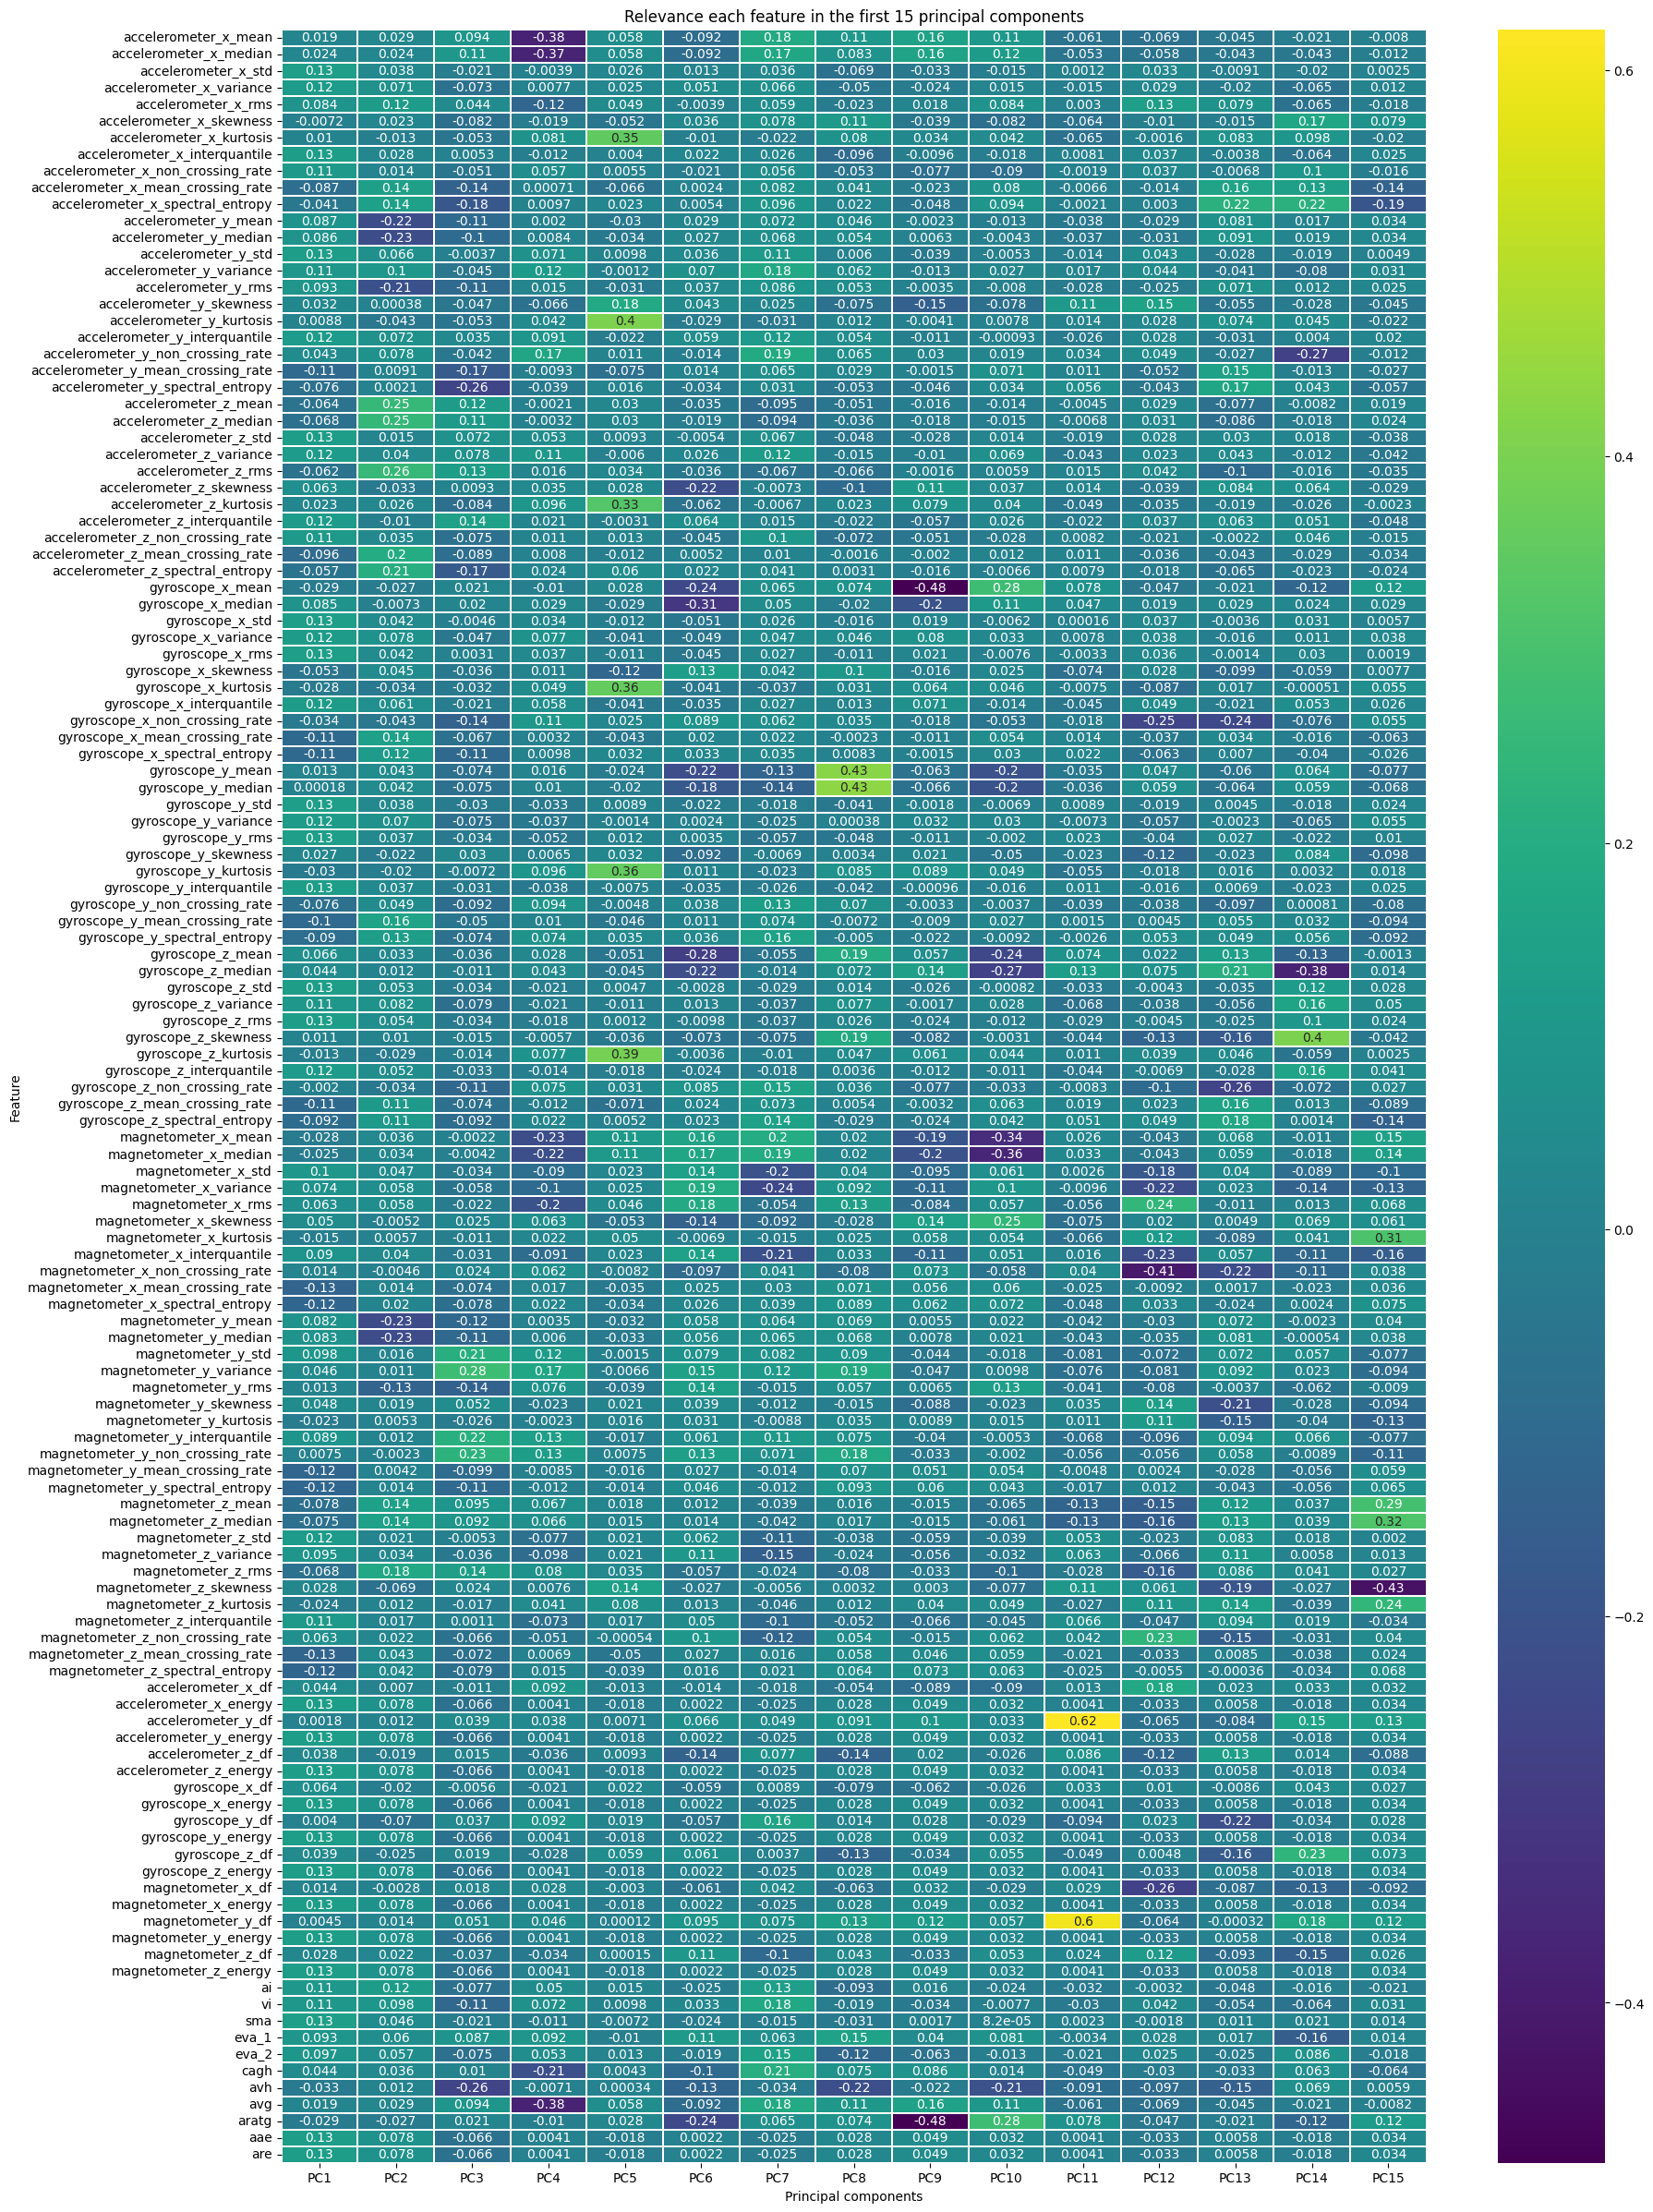

In [117]:
plot_relevance(pca_dataframe_relevant, relevant_pc)